In [21]:
import pandas as pd
import plotly.express as px
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA


In [10]:
absenteeism_2 = 'Resources/absenteeism.csv'

absenteeism_2df = pd.read_csv(absenteeism_2, index_col=False)

absenteeism_2df.head()

,EmployeeNumber,Gender,City,JobTitle,DepartmentName,StoreLocation,Division,Age,LengthService,AbsentHours
0,1,F,Burnaby,Baker,Bakery,Burnaby,Stores,32.0,6.02,36.58
1,2,M,Courtenay,Baker,Bakery,Nanaimo,Stores,40.0,5.53,30.17
2,3,M,Richmond,Baker,Bakery,Richmond,Stores,49.0,4.39,83.81
3,4,F,Victoria,Baker,Bakery,Victoria,Stores,45.0,3.08,70.02
4,5,M,New Westminster,Baker,Bakery,New Westminster,Stores,36.0,3.62,0.00


In [12]:
df = absenteeism_2df[["Gender", "Age", "LengthService", "AbsentHours"]]
df.head()

,Gender,Age,LengthService,AbsentHours
0,F,32.0,6.02,36.58
1,M,40.0,5.53,30.17
2,M,49.0,4.39,83.81
3,F,45.0,3.08,70.02
4,M,36.0,3.62,0.00


In [17]:
df['Gender'] = LabelEncoder().fit_transform(df['Gender'])
df.head()

c:\Users\justi\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Gender,Age,LengthService,AbsentHours
0,0,32.0,6.02,36.58
1,1,40.0,5.53,30.17
2,1,49.0,4.39,83.81
3,0,45.0,3.08,70.02
4,1,36.0,3.62,0.00


In [18]:
# Convert 'Age' to a numeric value
df['Age'] = pd.to_numeric(df['Age'])

c:\Users\justi\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [19]:
X = df.drop("AbsentHours", axis=1)

In [20]:
# Scale the dataset using MinMaxScaler()
X_scaled = MinMaxScaler().fit_transform(X)
X_scaled

array([[0.        , 0.37837838, 0.13743426],
       [1.        , 0.48648649, 0.12622913],
       [1.        , 0.60810811, 0.10016007],
       ...,
       [0.        , 0.72972973, 0.09147039],
       [0.        , 0.52702703, 0.14040704],
       [1.        , 0.56756757, 0.1179968 ]])

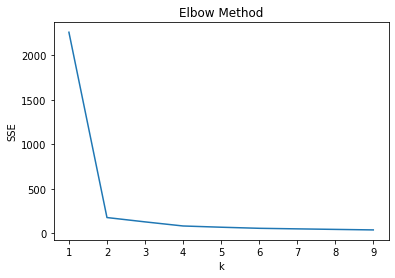

In [22]:
sse = {}
K = range(1,10)
for k in K:
    kmeanmodel = KMeans(n_clusters=k).fit(X_scaled)
    sse[k]= kmeanmodel.inertia_
    
# Plot
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel('k')
plt.ylabel('SSE')
plt.title('Elbow Method')
plt.show()

In [23]:
# Create a KMeans model with 3 clusters
model = KMeans(n_clusters=3, random_state=42).fit(X_scaled)

In [38]:
# Fitting model
model.fit(df)

KMeans(n_clusters=3, random_state=42)

In [39]:
# Get the predictions
predictions = model.predict(df)
print(predictions)

[0 0 2 ... 1 2 1]


In [40]:
# Add a new class column to the df_iris
df["class"] = model.labels_
df.head()

c:\Users\justi\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Gender,Age,LengthService,AbsentHours,Age Group,class
0,0,32.0,6.02,36.58,1,0
1,1,40.0,5.53,30.17,2,0
2,1,49.0,4.39,83.81,3,2
3,0,45.0,3.08,70.02,4,2
4,1,36.0,3.62,0.00,1,0


In [41]:
# Create a scatterplot of df_iris
df.hvplot.scatter(x="Age", y="AbsentHours", by="class")

:NdOverlay   [class]
   :Scatter   [Age]   (AbsentHours)

In [42]:
# Create a scatterplot of df_iris
df.hvplot.scatter(x="Gender", y="AbsentHours", by="class")

:NdOverlay   [class]
   :Scatter   [Gender]   (AbsentHours)

In [43]:
# Create a scatterplot of df_iris
df.hvplot.scatter(x="LengthService", y="AbsentHours", by="class")

:NdOverlay   [class]
   :Scatter   [LengthService]   (AbsentHours)

In [24]:
# Calculate predicted values.
y_pred = model.predict(X_scaled)

In [25]:
# Add predicted values onto the original dataframe
df_y = pd.DataFrame(y_pred, columns=['Cluster'])
combined = df.join(df_y, how='inner')
combined.head()

,Gender,Age,LengthService,AbsentHours,Cluster
0,0,32.0,6.02,36.58,0
1,1,40.0,5.53,30.17,1
2,1,49.0,4.39,83.81,1
3,0,45.0,3.08,70.02,2
4,1,36.0,3.62,0.00,1


<AxesSubplot:title={'center':'AbsentHours'}, xlabel='[Cluster]'>

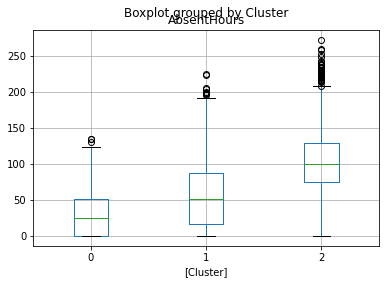

In [27]:
# Plot boxplots of the official time distributions by cluster
combined.boxplot(['AbsentHours'], by=['Cluster'])

In [28]:
# Print out summary statistics of ages by M/F and Cluster
combined.groupby(['Gender','Cluster']).describe()['Age']

count       mean       std   min   25%   50%   75%   max
Gender Cluster                                                           
0      0        2084.0  33.354607  6.218341   4.0  30.0  35.0  38.0  41.0
       2        2036.0  49.438605  6.178401  42.0  44.0  48.0  53.0  78.0
1      1        4216.0  42.702562  9.680899   8.0  36.0  43.0  49.0  77.0

In [37]:
# Print out summary statistics of ages by LengthService and Cluster
combined.groupby(['LengthService','Cluster']).describe()['Age']

count  mean  std   min   25%   50%   75%   max
LengthService Cluster                                                
0.01          1          1.0  17.0  NaN  17.0  17.0  17.0  17.0  17.0
0.05          1          1.0  42.0  NaN  42.0  42.0  42.0  42.0  42.0
0.09          1          1.0  54.0  NaN  54.0  54.0  54.0  54.0  54.0
0.10          1          1.0  43.0  NaN  43.0  43.0  43.0  43.0  43.0
0.18          2          1.0  54.0  NaN  54.0  54.0  54.0  54.0  54.0
...                      ...   ...  ...   ...   ...   ...   ...   ...
36.75         1          1.0  55.0  NaN  55.0  55.0  55.0  55.0  55.0
              2          1.0  55.0  NaN  55.0  55.0  55.0  55.0  55.0
39.34         1          2.0  57.0  0.0  57.0  57.0  57.0  57.0  57.0
39.45         1          1.0  57.0  NaN  57.0  57.0  57.0  57.0  57.0
43.74         2          1.0  62.0  NaN  62.0  62.0  62.0  62.0  62.0

[2043 rows x 8 columns]

In [29]:
# Create a function that takes in gender and age and assigns an age group based on the following break points for each gender:
# * The lowest 1st quartile
# * Each median
# * The highest 3rd quartile
def age_group(gender, age):
    if gender == 0:
        if age < 29:
            return 0
        elif age < 36:
            return 1
        elif age < 41:
            return 2
        elif age < 45:
            return 3
        elif age < 51:
            return 4
        else:
            return 5
    if gender == 1:
        if age < 33:
            return 0
        elif age < 40:
            return 1
        elif age < 48:
            return 2
        elif age < 53:
            return 3
        elif age < 60:
            return 4
        else:
            return 5

In [31]:
# Apply the custom age group to the original data frame and save it to the column 'Age Group'
df['Age Group'] = df.apply(lambda row: age_group(row['Gender'], row['Age']), axis=1)
df.head()

c:\Users\justi\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Gender,Age,LengthService,AbsentHours,Age Group
0,0,32.0,6.02,36.58,1
1,1,40.0,5.53,30.17,2
2,1,49.0,4.39,83.81,3
3,0,45.0,3.08,70.02,4
4,1,36.0,3.62,0.00,1


<AxesSubplot:xlabel='LengthService'>

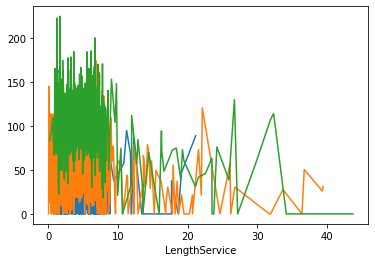

In [34]:
# Plot median finish times by division for each cluster
combined[combined['Cluster'] == 0].groupby('LengthService').median()['AbsentHours'].plot()
combined[combined['Cluster'] == 1].groupby('LengthService').median()['AbsentHours'].plot()
combined[combined['Cluster'] == 2].groupby('LengthService').median()['AbsentHours'].plot()

<AxesSubplot:xlabel='Age'>

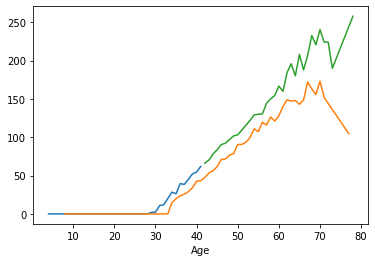

In [36]:
# Plot median finish times by division for each cluster
combined[combined['Cluster'] == 0].groupby('Age').median()['AbsentHours'].plot()
combined[combined['Cluster'] == 1].groupby('Age').median()['AbsentHours'].plot()
combined[combined['Cluster'] == 2].groupby('Age').median()['AbsentHours'].plot()